Exercise 1: Deep Learning Vs. Traditional Machine Learning



Objective:

Understand the differences between traditional machine learning and deep learning.

Instructions:

1. Create a table comparing traditional machine learning and deep learning based on the following aspects:

Feature Engineering
Data Processing
Scalability
Pattern Discovery
Computational Requirements
2. Identify one real-world problem where traditional ML is better suited and one where deep learning is the superior choice.
3. Write a short paragraph (3-5 sentences) explaining why deep learning has an advantage in unstructured data processing.

| Aspect                         | Traditional Machine Learning                        | Deep Learning                                       |
| ------------------------------ | --------------------------------------------------- | --------------------------------------------------- |
| **Feature Engineering**        | Requires manual, domain-specific feature extraction | Learns features automatically during training       |
| **Data Processing**            | Performs well with structured/tabular data          | Excels with unstructured data (images, text, audio) |
| **Scalability**                | Limited scalability with massive data               | Improves with large datasets and more layers        |
| **Pattern Discovery**          | Detects simple to moderately complex patterns       | Captures highly complex, non-linear relationships   |
| **Computational Requirements** | Lower; can run on CPU or light hardware             | High; often needs GPUs/TPUs for training            |

Real-World Problem Examples
Better suited for Traditional ML: Predicting loan default risk using customer financial history (structured tabular data).
Better suited for Deep Learning: Automatic image classification in self-driving cars (unstructured visual data).

Deep learning models, especially neural networks like CNNs and RNNs, can automatically learn hierarchical representations from raw, unstructured data. Unlike traditional ML, they do not require extensive manual feature extraction, which makes them highly effective for tasks like image recognition, natural language processing, and audio analysis. By stacking multiple layers, they can capture complex and abstract patterns that are often impossible to define manually. This ability to learn directly from raw data gives deep learning a significant advantage in unstructured data domains.

Exercise 2: Artificial Neural Networks (ANNs)



Objective:

Identify and understand the key components of an artificial neural network.

Instructions:

1. Draw (or use a diagram tool) to create a simple artificial neural network (ANN) with:

An input layer (3 neurons)
One hidden layer (4 neurons)
An output layer (2 neurons)
2. Label the components of the network: neurons, weights, biases, activation function, and layers.
3. Write a short description (3-5 sentences) explaining how information flows through the network.

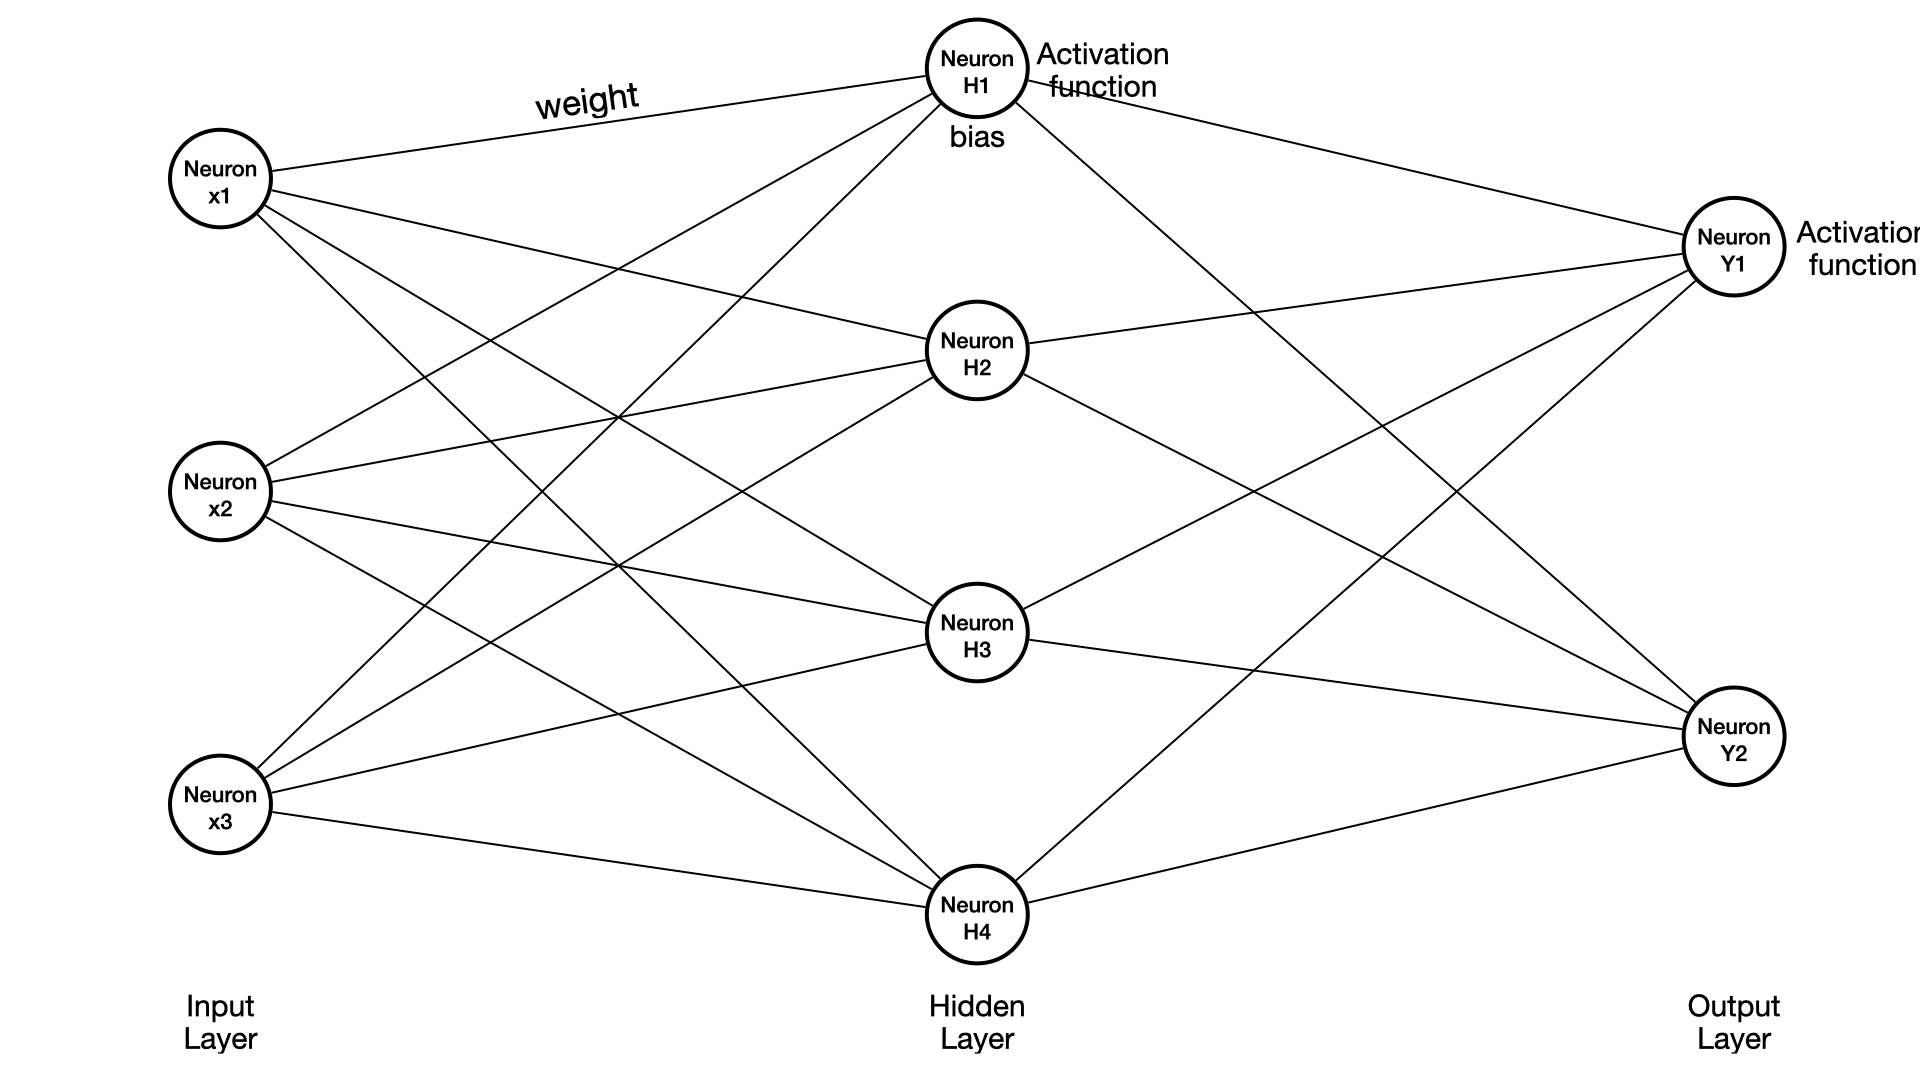

In this ANN, input data flows from the input layer’s 3 neurons through weighted connections to hidden layer's 4 neurons. Each hidden neuron computes a weighted sum of its inputs, adds a bias, and passes the result through an activation function to introduce non-linearity. The hidden layer outputs are then fed into the 2 output neurons, which perform the same computation to produce final predictions. This process allows the network to learn complex patterns by adjusting weights and biases during training.

Exercise 3: Creating The Dataset And Visualizing The Data



Objective: Generate A Dataset With Noise And Visualize It.

Instructions:

1. Import the necessary libraries: numpy, matplotlib.pyplot, and mean_squared_error from sklearn.metrics.
2. Create a set of 20 points using the formula ( y = -x^2 ), adding normally distributed noise with a mean of 0 and a standard deviation of 0.05 using np.random.normal.

Hint:

np.random.seed(0)
x = np.arange(-1, 1, 0.1)
y = -x**2 + np.random.normal(0, 0.05, len(x))


3. Plot the generated points using a scatter plot to visualize the dataset with noise.
4. Split the dataset into a training set (first 12 points) and a test set (last 8 points).

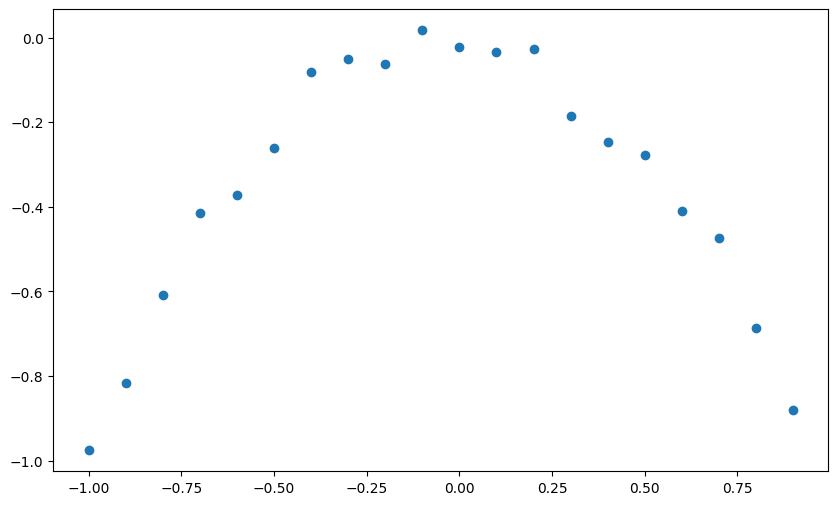

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.arange(-1, 1, 0.1)
y = -X**2 + np.random.normal(0, 0.05, len(X))

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

Exercise 4: Fitting Polynomial Models Of Different Degrees



Objective: Fit Polynomial Models Of Varying Degrees And Observe Overfitting.

Instructions:

1. Define a function polynomial_fit that takes a degree as input and returns a polynomial that best fits the training data.
2. Define another function plot_polyfit that plots the training set, test set, and the fitted polynomial curve for a given degree.
3. Use plot_polyfit to visualize the fit for polynomials of degree 1, 7, and 11.
4. Observe how the model behaves on the training and test sets as the degree of the polynomial increases.

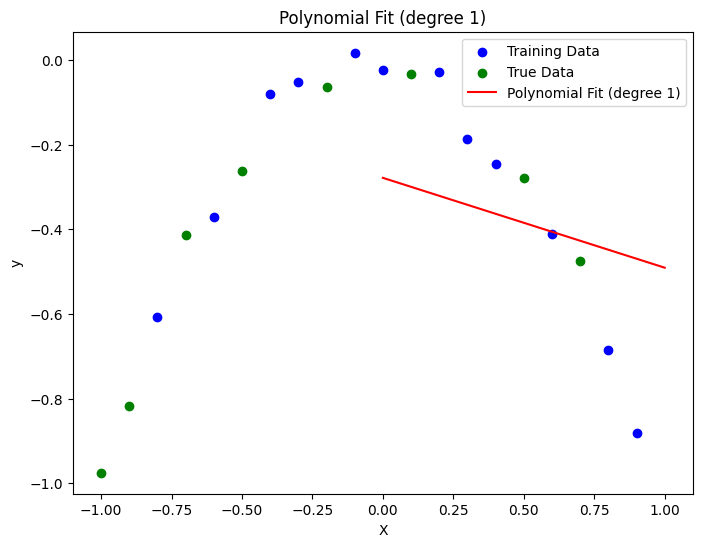

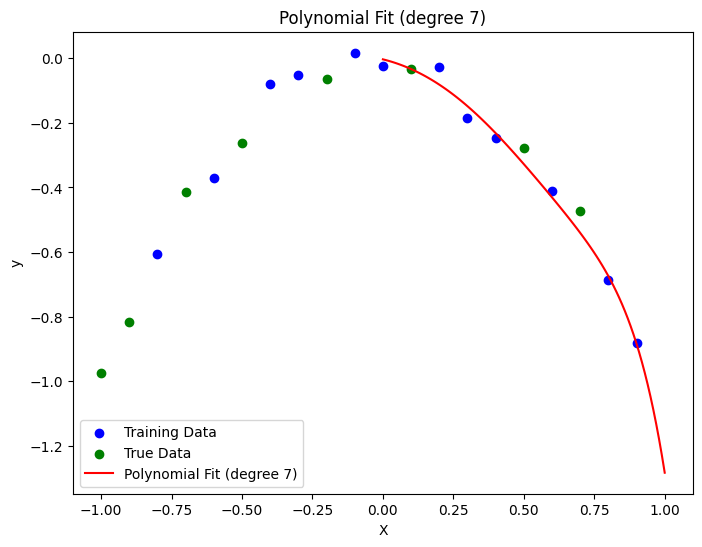

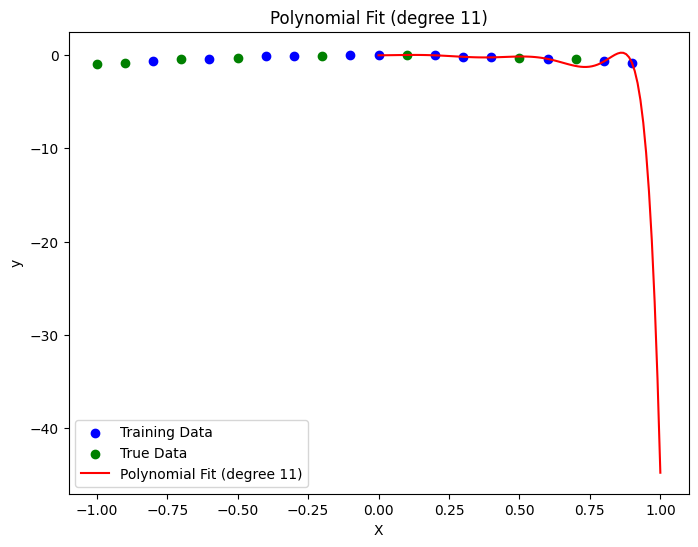

In [6]:
def polynomial_fit(degree):
    """
    Fit a polynomial of given degree to the training data.
    Returns the coefficients of the polynomial.
    """
    coeffs = np.polyfit(X_train, y_train, degree)
    return coeffs

def plot_polyfit(degree):
    """
    Plots the training data, test data, and the fitted polynomial curve.
    """
    coeffs = polynomial_fit(degree)
    poly = np.poly1d(coeffs)

    X_plot = np.linspace(0, 1, 100)
    y_plot = poly(X_plot)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='True Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Fit (degree {degree})')

    plt.title(f'Polynomial Fit (degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Visualize fits for degrees 1, 7, and 11
for degree in [1, 7, 11]:
    plot_polyfit(degree)


Exercise 5: Cross-Validation To Find The Optimal Degree



Objective: Use Cross-Validation To Determine The Best Polynomial Degree.

Instructions:

1. Loop through polynomial degrees from 1 to 11.
2. For each degree, calculate the Root Mean Squared Error (RMSE) for both the training and test sets.
3. Store the results (degree, RMSE for training, RMSE for test) in a list.
4. Plot the RMSE values for both the training and test sets against the polynomial degree using a logarithmic scale for the y-axis.
5. Identify the degree that minimizes the RMSE on the test set and confirm that it corresponds to the true underlying model (( y = -x^2 )).

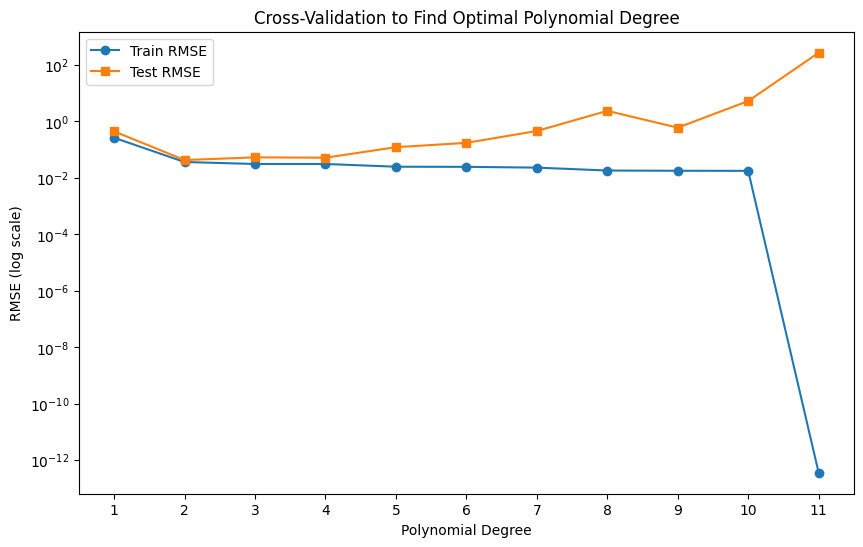

Optimal polynomial degree: 2
Optimal degree matches the true model (degree 2).


In [8]:
results = []

# Loop through degrees 1 to 11
for degree in range(1, 12):
    coeffs = polynomial_fit(degree)
    poly = np.poly1d(coeffs)

    y_train_pred = poly(X_train)
    y_test_pred = poly(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results.append((degree, rmse_train, rmse_test))

# Convert to NumPy array for easier plotting
results = np.array(results)

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], marker='o', label='Train RMSE')
plt.plot(results[:, 0], results[:, 2], marker='s', label='Test RMSE')
plt.yscale('log')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE (log scale)')
plt.title('Cross-Validation to Find Optimal Polynomial Degree')
plt.xticks(results[:, 0])
plt.legend()
plt.show()

# Find the degree that minimizes test RMSE
optimal_degree = results[np.argmin(results[:, 2]), 0]
print(f"Optimal polynomial degree: {int(optimal_degree)}")